# MNIST - Handwritten Digit Recognizer

The MNIST dataset is a well-known and widely used dataset in the machine learning community, particularly for tasks involving image classification. It consists of 70,000 grayscale images of handwritten digits, which are 28 pixels by 28 pixels in size and represent a single digit from 0 through 9. The images are divided into a training set of 60,000 images and a test set of 10,000 images. The dataset was created by NIST and has been widely used in research and academic settings for testing and evaluating machine learning models. 

The MNIST dataset is well-suited for testing machine learning models for image classification tasks, particularly those involving handwritten digits. By training a machine learning model on the MNIST dataset, we can build a system that is able to recognize handwritten digits from images. This can be useful in a variety of applications, such as automating the process of transcribing handwritten documents or building a system to recognize digits in financial documents. Additionally, the small size of the images in the MNIST dataset makes it easy to train and evaluate machine learning models, making it a valuable resource for researchers and practitioners working on image classification tasks.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(42000, 785)

In [8]:
test.shape

(28000, 784)

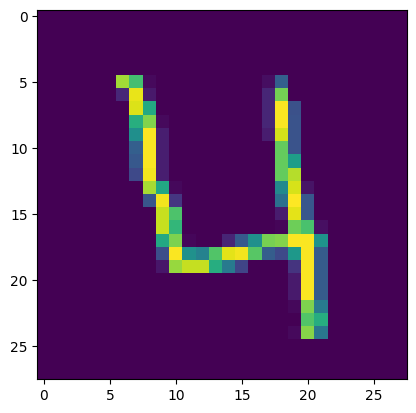

In [9]:
num=np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(num)
plt.show()

We use plt.imshow() function to convert a array data to graph

In [10]:
missing_value_cnt=train.isnull().sum()
missing_value_cnt

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Model Training and evaluation

In [11]:
x=np.array(train)
y=np.array(test)

x_train=x[:,1:]
y_train=x[:,0]
x_test=y

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
x_train=x_train.reshape(-1,28,28,1)

In [14]:
datagen=ImageDataGenerator(
    rotation_range=15,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

datagen.fit(x_train)

In [15]:
x_train=x_train.reshape(-1,784)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
int(knn.predict(x_test[100].reshape(1,-1)))

0

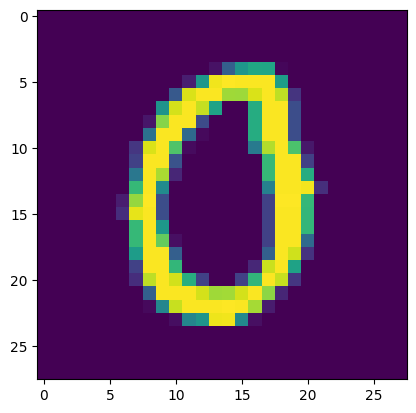

In [19]:
num=np.array(test.iloc[100,:]).reshape(28,28)
plt.imshow(num)
plt.show()

In [20]:
int(knn.predict(x_test[107].reshape(1,-1)))

5

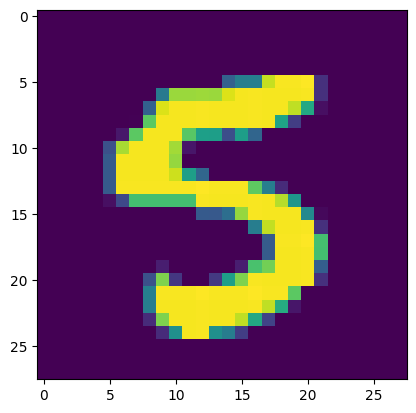

In [21]:
num=np.array(test.iloc[107,:]).reshape(28,28)
plt.imshow(num)
plt.show()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
95,96,0
96,97,0
97,98,0
98,99,0


In [33]:
output=pd.DataFrame(knn.predict(x_test))

SyntaxError: '(' was never closed (3171011892.py, line 1)

In [32]:
output

,0
0,2
